<a href="https://colab.research.google.com/github/CatarinaCarneiroSilva/Machine-Learning-e-Analytics/blob/main/MVP_Machine_Learning_Catarina_Carneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics

## Catarina Carneiro da Silva

## 1. Definição do Problema

Neste estudo queremos analisar a influência do gênero de um funcionário nas atividades do mercado de trabalho, com foco no setor terciário (comércio, serviços e turismo). Selecionamos os dados do Mato Grosso do Sul, para trabalhar com um dataset menor.
**No problema sugerido, usaremos o método de classificação para saber se a inclusão de novas informações serão suficientes para definir o gênero do novo usuário.**
A premissa conhecida é que as mulheres possuem estruturalmente salários menores que os homens, além de terem profissões preponderamentemente masculinas e outras femininas, a intenção é refutar ou não essa hipótese baseados em dados reais.

O dataset usado neste projeto são os microdados da **RAIS 2022 (Relação Anual de Informações Sociais)**, proveniente do Ministério do Trabalho.
Essa base de informações é muito abrangente, podendo originar diversas inferências. No entanto, para ter resultado mais objetivo com o desejado, utilizaremos um subconjunto da base original, considerando apenas algumas variáveis disponíveis, que são:

**Informações sobre os atributos:**
1. **CNAE 2.0** - CNAE da atividade do emprego
2. **Faixa Etária** - Faixa de idade do funcionário:
  1. entre 10 a 14 anos
  2. entre 15 a 17 anos
  3. entre 18 a 24	anos
  4. entre 25 a 29	anos
  5. entre 30 a 39	anos
  6. entre 40 a 49	anos
  7. entre 50 a 64 anos
  8. 65 anos ou mais
3. **Escoladidade após 2005** - Escolaridade do funcionário:
 1. Analfabeto
 2. Até 5ª Incompleto
 3. 5ª Completo Fundamental
 4. 6ª a 9ª Fundamental
 5. Fundamental Completo
 6. Médio Incompleto
 7. Médio Completo
 8. Superior Incompleto
 9. Superior Completo
 10. Mestrado
 11. Doutorado
4. **Idade** - Idade do funcionário
5. **Raça Cor** - Raça segundo funcionário:
 1. Indígena / 2. Branca / 4. Preta / 6. Amarela / 8. Parda / 9. Não informado
6. **Sexo Trabalhador** - Gênero do usuário:
  1. Masculino / 2. Feminino / 9. Ignorado
7. **UF** - Estado 50 = Mato Grosso do Sul
8. **valor_remuneração_media** - Remuneração média dos funcionários

In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Preparação de Dados

Usaremos o pacote Pandas (Python Data Analysis Library) para carregar o arquivo .csv elaborado com os microdados necessários.


In [ ]:
# Carrega arquivo csv
url = "https://raw.githubusercontent.com/CatarinaCarneiroSilva/Machine-Learning-e-Analytics/main/rais2002_cat_uf50.csv"
rais2022 = pd.read_csv(url,delimiter=';')
print(rais2022.head())


   CNAE 2.0 Classe  Faixa Etária  Escolaridade após 2005  Idade  Raça Cor  \
0            94120             7                       1     61         8   
1            84116             5                       1     30        99   
2            84116             5                       1     31        99   
3            84116             4                       1     28        99   
4            84116             8                       1     69        99   

   Sexo Trabalhador  uf  valor_remuneracao_media  
0                 1  50                  2014.00  
1                 1  50                  1116.52  
2                 1  50                  1091.70  
3                 1  50                  1091.70  
4                 1  50                  2075.62  


Como todos os dados são pertencentes a mesma UF, deletaremos essa coluna. Também retiraremos a coluna Faixa Etária, já que o dado mais específico pode ser encontrado na coluna Idade.
Para trabalhar apenas o setor terciário, como pretendido, filtraremos a coluna CNAE 2.0 Classe para conter apenas as CNAES desse setor.
Para limpar o dataset, excluiremos os dados de gênero que não correspondem ao sexo Feminino ou Masculino e também da coluna Raça Cor informações diferentes das tradicionais.

In [ ]:
# Deletar coluna UF e Faixa Etária
del rais2022['uf']
del rais2022['Faixa Etária']

print(rais2022.head())

   CNAE 2.0 Classe  Escolaridade após 2005  Idade  Raça Cor  Sexo Trabalhador  \
0            94120                       1     61         8                 1   
1            84116                       1     30        99                 1   
2            84116                       1     31        99                 1   
3            84116                       1     28        99                 1   
4            84116                       1     69        99                 1   

   valor_remuneracao_media  
0                  2014.00  
1                  1116.52  
2                  1091.70  
3                  1091.70  
4                  2075.62  


In [ ]:
# Filtrar coluna CNAE 2.0 Classe e Sexo Trabalhador
rais2022 = rais2022[(rais2022['CNAE 2.0 Classe'] >= 45111) & (rais2022['CNAE 2.0 Classe'] <= 69206)]
rais2022 = rais2022[(rais2022['Sexo Trabalhador'] == 1) | (rais2022['Sexo Trabalhador'] == 2)]
rais2022 = rais2022[(rais2022['Raça Cor'] <= 9)]

print(rais2022.head())

    CNAE 2.0 Classe  Escolaridade após 2005  Idade  Raça Cor  \
18            49302                       1     46         8   
27            56112                       1     57         9   
28            55108                       1     32         2   
30            49213                       1     44         2   
36            47296                       1     29         8   

    Sexo Trabalhador  valor_remuneracao_media  
18                 1                  1450.00  
27                 1                     0.00  
28                 1                  1506.91  
30                 1                     0.00  
36                 1                  1978.38  


### 2.1. Estatísticas Descritivas

Inicialmente examinaremos as dimensões do dataset, suas principais informações e alguns exemplos de linhas para sabermos como os dados estão se comportando. Assim, percebemos que todas as variáveis são numerais, com a receita podendo conter decimais.

In [ ]:
# Mostra as dimensões do dataset
print(rais2022.shape)

(238311, 6)


In [ ]:
# Mostra as informações do dataset
print(rais2022.info())

<class 'pandas.core.frame.DataFrame'>
Index: 238311 entries, 18 to 778489
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CNAE 2.0 Classe          238311 non-null  int64  
 1   Escolaridade após 2005   238311 non-null  int64  
 2   Idade                    238311 non-null  int64  
 3   Raça Cor                 238311 non-null  int64  
 4   Sexo Trabalhador         238311 non-null  int64  
 5   valor_remuneracao_media  238311 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 12.7 MB
None


In [ ]:
# Mostra as 10 primeiras linhas do dataset
rais2022.head(10)

,CNAE 2.0 Classe,Escolaridade após 2005,Idade,Raça Cor,Sexo Trabalhador,valor_remuneracao_media
18,49302,1,46,8,1,1450.00
27,56112,1,57,9,1,0.00
28,55108,1,32,2,1,1506.91
30,49213,1,44,2,1,0.00
36,47296,1,29,8,1,1978.38
38,47113,1,47,2,1,0.00
41,47440,1,55,9,1,0.00
46,47440,1,57,6,1,1212.00
51,49248,1,49,1,1,0.00
59,45307,1,56,8,1,1782.22


In [ ]:
# Mostra as 10 últimas linhas do dataset
rais2022.tail(10)

,CNAE 2.0 Classe,Escolaridade após 2005,Idade,Raça Cor,Sexo Trabalhador,valor_remuneracao_media
778303,46877,11,36,9,2,1500.00
778465,45307,11,34,4,2,3745.38
778474,47814,11,33,8,2,5969.77
778475,47725,11,42,2,2,9134.97
778476,47725,11,43,2,2,8288.62
778485,69206,11,70,9,2,3355.17
778486,65502,11,42,2,2,6621.69
778487,64239,11,32,2,2,5792.39
778488,64239,11,35,4,2,5051.68
778489,47717,11,25,2,2,3558.65


In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
rais2022.describe()

,CNAE 2.0 Classe,Escolaridade após 2005,Idade,Raça Cor,Sexo Trabalhador,valor_remuneracao_media
count,238311.000000,238311.000000,238311.000000,238311.000000,238311.000000,238311.000000
mean,50484.083181,6.817965,35.057156,6.220846,1.426145,2837.167884
std,6172.726557,1.284697,11.915492,3.033876,0.494516,7913.385782
min,45111.000000,1.000000,14.000000,1.000000,1.000000,0.000000
25%,47113.000000,7.000000,25.000000,2.000000,1.000000,1361.110000
50%,47717.000000,7.000000,33.000000,8.000000,1.000000,1739.460000
75%,52117.000000,7.000000,43.000000,9.000000,2.000000,2513.340000
max,69206.000000,11.000000,92.000000,9.000000,2.000000,693600.000000


Como exercício inicial do nosso estudo, observaremos se a quantidade de vínculos de cada gênero está balanceado. Pela média desses dados (1,43) já podemos imaginar uma tendência maior de trabalhadores do sexo masculino no estado. Confirmamos a desconfiança que existem mais registros de dados 1 (masculino), do que o 2 (feminino), o que mostra um primeiro sinal de preponderância dos homens no mercado de trabalho.

In [ ]:
# distribuição das classes
print(rais2022.groupby('Sexo Trabalhador').size())

Sexo Trabalhador
1    136756
2    101555
dtype: int64


### 2.2. Operações

Para analisarmos a precisão do modelo final, separaremos os dados em conjuntos de teste e treino por meio do comando train_test_split, que retorna 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste. Colunas de atributos: todas exceto de gênero / Coluna da classe: Sexo Trabalhador. O passo seguinte será usar a validação cruzada para treinar e avaliar os modelos, pois não queremos ter underfitting (classificador pouco aderente ao conjunto de treinamento) e nem overfitting (classificador aderente demais ao conjunto de treinamento). A métrica utilizada foi a acurácia, já que nesse estudo é importante sabermos o quanto o modelo está acertando.

In [ ]:
# Separação em bases de treino e teste (holdout)

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = rais2022.values
X = rais2022.drop(columns=['Sexo Trabalhador'])
y = rais2022['Sexo Trabalhador']
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Antes de iniciarmos os modelos, é importante verificar quais atributos são realmente relevantes. Como são poucas variáveis sendo observadas, consideraremos o método *feature selection* de importância de atributos, pois nele não é necessário estabelecer o número de atributos que se deseja. Como os referentes a escolaridade e raça tiveram relevância abaixo de 5%, iremos relirá-los do modelo. Esse resultado indica que a escolaridade ou raça não colaboram o suficiente para o modelo definir o gênero da pessoa registrada. Para que o modelo seja mais dinâmico, reduziremos a amostragem pela metade. Como a média da variável de gênero manteve-se, podemos considerar que mantivemos a proporção dos dados.

In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", rais2022.columns[[0, 1, 2, 3, 5]])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['CNAE 2.0 Classe', 'Escolaridade após 2005', 'Idade', 'Raça Cor',
       'valor_remuneracao_media'],
      dtype='object')
[0.25485352 0.03022536 0.14141533 0.01426793 0.55923785]


In [ ]:
# Separação em bases de treino e teste (holdout)

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = rais2022.values
X = rais2022.drop(columns=['Sexo Trabalhador','Escolaridade após 2005','Raça Cor'])
y = rais2022['Sexo Trabalhador']
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação e utilizando 50% do dataset

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

print(X_train.describe())
print(y_train.describe())

       CNAE 2.0 Classe          Idade  valor_remuneracao_media
count    119155.000000  119155.000000            119155.000000
mean      50495.381167      35.021862              2830.095733
std        6172.315229      11.904782              8173.213168
min       45111.000000      14.000000                 0.000000
25%       47113.000000      25.000000              1360.985000
50%       47717.000000      33.000000              1735.040000
75%       52117.000000      43.000000              2507.595000
max       69206.000000      86.000000            693600.000000
count    119155.000000
mean          1.426142
std           0.494517
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: Sexo Trabalhador, dtype: float64


## 3. Modelagem e Treinamento

Rodaremos 10 modelos/*ensembles* diferentes. Como resultado, o **Gradient Boosting** apresentou a melhor acuária (69,58%).

LR: 0.576207 (0.002294)
KNN: 0.656565 (0.002212)
CART: 0.616575 (0.002730)
NB: 0.591658 (0.013931)
Bagging: 0.651999 (0.003439)
RF: 0.652260 (0.002523)
ET: 0.629189 (0.002707)
Ada: 0.690596 (0.003333)
GB: 0.695816 (0.002998)
Voting: 0.584424 (0.003086)


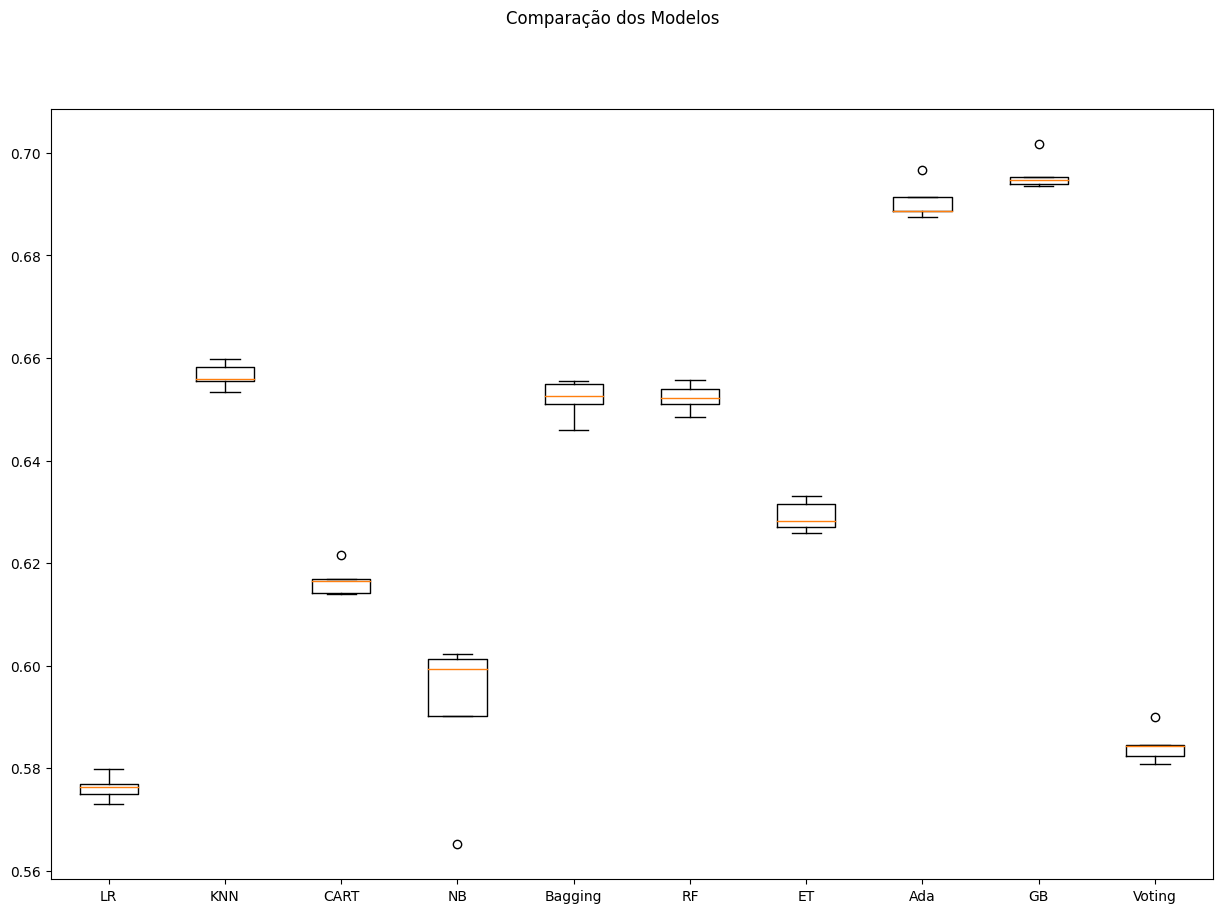

In [ ]:
#TEMPO DE EXECUÇÃO: 8 MINUTOS

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Definindo o número de folds
num_folds = 5
kfold = KFold(n_splits=num_folds)

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

O próximo passo será analisar, utilizando a biblioteca Pipeline, como os modelos se saem com os dados normalizados e padronizados, para verificar se a melhor acurácia do GB se confirma. Esse modelo continuou se sobressaindo em todas as alterações realizadas na base de dados. Também é importante notarmos que a acurácia é similar (69,6%) em todos os casos, revelando que normalizar ou padronizar os dados não alterou na aderência do modelo.

LR-orig: 0.576 (0.002)
KNN-orig: 0.657 (0.002)
CART-orig: 0.617 (0.003)
NB-orig: 0.592 (0.014)
Bag-orig: 0.652 (0.003)
RF-orig: 0.652 (0.003)
ET-orig: 0.629 (0.003)
Ada-orig: 0.691 (0.003)
GB-orig: 0.696 (0.003)
Vot-orig: 0.584 (0.003)
LR-padr: 0.595 (0.001)
KNN-padr: 0.650 (0.002)
CART-padr: 0.616 (0.003)
NB-padr: 0.592 (0.014)
Bag-padr: 0.652 (0.002)
RF-padr: 0.652 (0.002)
ET-padr: 0.629 (0.003)
Ada-padr: 0.691 (0.003)
GB-padr: 0.696 (0.003)
Vot-padr: 0.594 (0.002)
LR-norm: 0.594 (0.001)
KNN-norm: 0.658 (0.003)
CART-norm: 0.617 (0.002)
NB-norm: 0.592 (0.014)
Bag-norm: 0.652 (0.003)
RF-norm: 0.652 (0.003)
ET-norm: 0.629 (0.003)
Ada-norm: 0.691 (0.003)
GB-norm: 0.696 (0.003)
Vot-norm: 0.593 (0.002)


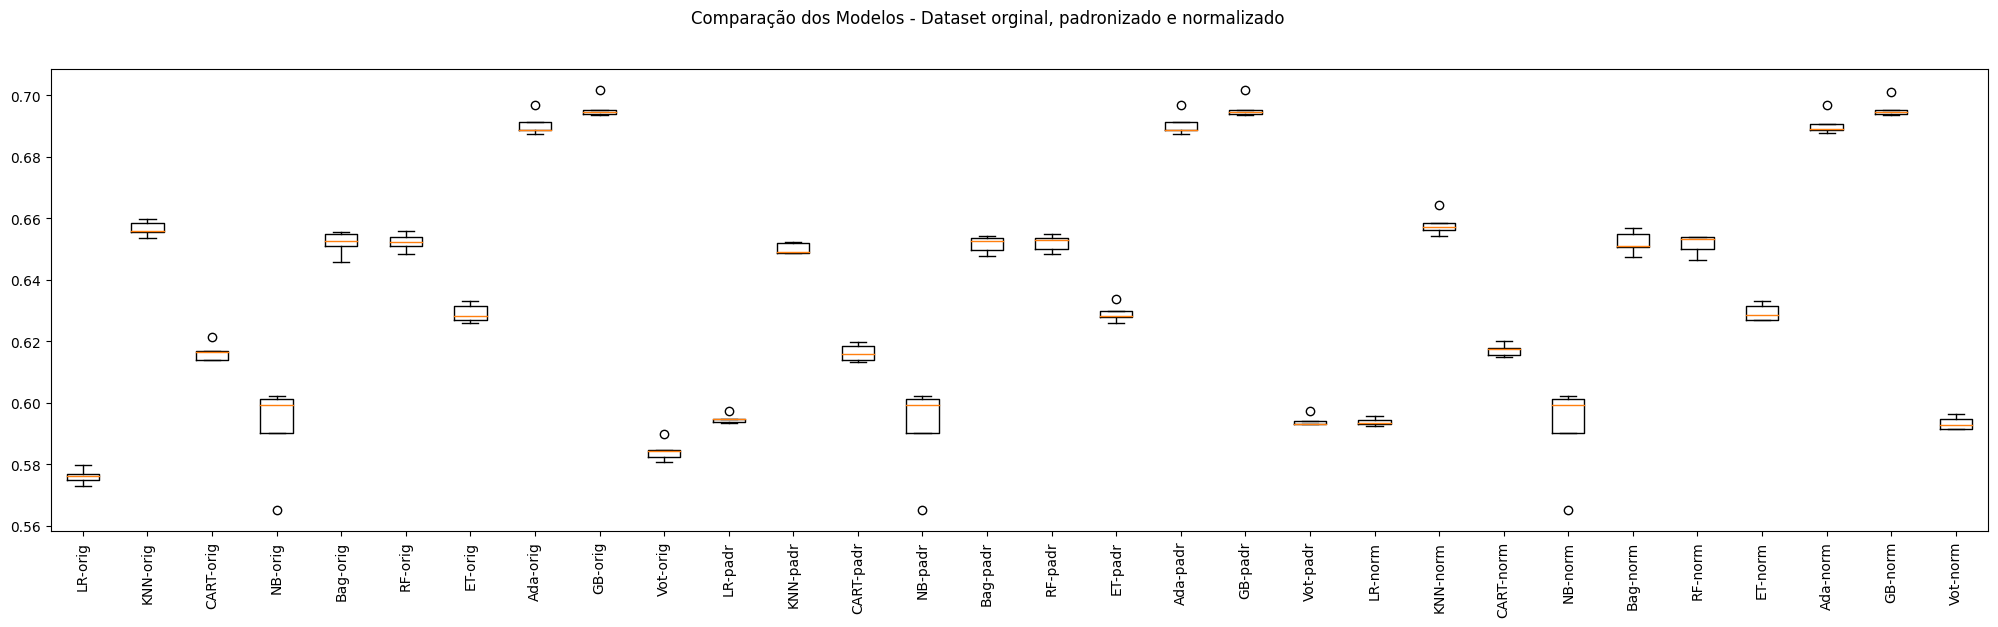

In [ ]:
#TEMPO DE EXECUÇÃO: 26 MINUTOS

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Para chegarmos ao melhor resultado possível, realizaremos a otimização dos hiperparâmetros do GB com a biblioteca Grid Search. Nesse caso, houve acurácia ligeiramente melhor do que nas opções vistas até o momento, com destaque para a utilização dos dados normalizados (69,96%). Mostrando que a normalização pode ajudar no ajuste do modelo.

In [ ]:
#TEMPO DE EXECUÇÃO: 20 MINUTOS

# Tuning do GB

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gb = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('gb-orig', Pipeline(steps=[gb])))
pipelines.append(('gb-padr', Pipeline(steps=[standard_scaler, gb])))
pipelines.append(('gb-norm', Pipeline(steps=[min_max_scaler, gb])))

# Definindo os parâmetros para otimização
param_grid = {
    'GB__n_estimators': [50, 100],
    'GB__max_depth': [3, 5],
    'GB__learning_rate': [0.05, 0.1]
}

# Prepara e executa o GridSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scoring = 'accuracy'
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: gb-orig - Melhor: 0.699064 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 100}
Sem tratamento de missings: gb-padr - Melhor: 0.699081 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 100}
Sem tratamento de missings: gb-norm - Melhor: 0.699627 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 100}


## 4. Avaliação de Resultados

Considerando todos os modelos analisados até o momento, o que alcançou o melhor resultado, segundo a acurácia, foi o GB com dados normalizados. Por isso, treinaremos esse selecionado em todo o conjunto de dados de treinamento (sem validação cruzada) e faremos predições para o conjunto de dados de teste, separado justamente para podermos confirmar os resultados nesse momento. A acurácia encontrada nesse momento em dados não vistos (69,91%) foi apenas um pouco menor, do que a encontrada anteriormente com otimização dos hiperparâmetros(69,96%).

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
normalizedX_train = scaler.transform(X_train)  # aplicação da normalização no conjunto de treino
model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)  # instanciando o modelo GB com os hiperparâmetros desejados
model.fit(normalizedX_train, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledX_test = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))

0.6991003390513276


A próxima etapa é treinar o modelo em todo o dataset considerado, e não apenas o conjunto de treino.

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
normalizedX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(normalizedX, y)

GradientBoostingClassifier(max_depth=5)

Como teste, colocaremos dados novos para fazermos as predições e analisarmos os resultados. Foram selecionadas duas CNAES de linhas aleatórias e acrescentamos dados de três pessoas que trabalham em cada uma dessas atividades, com 34 anos de idade e cuja única diferenciação foi a remuneração média.

In [29]:
cnae1 = rais2022.iloc[50]
cnae2 = rais2022.iloc[100]
print(cnae1)
print(cnae2)

#cnae1 = 56201 = Serviços de catering, bufê e outros serviços de comida preparada
#cnae2 = 45307 = Comércio de peças e acessórios para veículos automotores

CNAE 2.0 Classe            56201.00
Escolaridade após 2005         1.00
Idade                         41.00
Raça Cor                       8.00
Sexo Trabalhador               1.00
valor_remuneracao_media      492.01
Name: 385, dtype: float64
CNAE 2.0 Classe            45307.00
Escolaridade após 2005         1.00
Idade                         28.00
Raça Cor                       9.00
Sexo Trabalhador               1.00
valor_remuneracao_media     2771.89
Name: 842, dtype: float64


In [30]:
# Novos dados - não sabemos a classe!
data = {'CNAE 2.0 Classe':  [56201, 56201, 56201, 45307, 45307, 45307],
        'Idade': [34, 34, 34, 34, 34, 34],
        'valor_remuneracao_media': [9000, 6000, 3000, 9000, 6000, 3000],
        }

atributos = ['CNAE 2.0 Classe', 'Idade', 'valor_remuneracao_media']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.46026147 0.25641026 0.01297578]
 [0.46026147 0.25641026 0.00865052]
 [0.46026147 0.25641026 0.00432526]
 [0.00813447 0.25641026 0.01297578]
 [0.00813447 0.25641026 0.00865052]
 [0.00813447 0.25641026 0.00432526]]


In [31]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[2 2 2 1 1 1]


A resposta foi majoritariamente **feminina** para os dados de *Serviços de catering, bufê e outros serviços de comida preparada* e majoritariamente **masculina** para os dados de *Comércio de peças e acessórios para veículos automotores*, mostrando que essas atividades apresentam tendência de concentração de gênero, uma confirmação da nossa hipótese inicial.


O fato do modelo conseguir classificar o gênero com grande grau de certeza, quase 70%, também confirma que há uma diferenciação de gênero no mercado de trabalho. Deve-se considerar que o resultado corresponde apenas a um estado (MS) e setor (comércio, serviços e turismo), portanto o estudo pode ser estrapolado para o nível nacional e outras categorias econômicas para confirmar se essas características do mercado de trabalho serão mantidas.